In [1]:
# Importações de Bibliotecas Necessárias
import pandas as pd
import numpy as np
import time

from datetime import datetime
from datetime import timedelta  

from random import seed
from random import randint
from random import uniform

from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.dates as md

In [2]:
# Importa dataset de climas para cada regiao

# Dataset From: https://www.data.act.gov.au/Transport/Smart-Parking-Stays/3vsj-zpk7

print("Reading CSV...")
df = pd.read_csv('Smart_Parking_Stays.csv')

print("Done!")
df

Reading CSV...
Done!


,SectorCode,SectorName,LotName,BayNumber,BayName,Arrived,Departed,Street
0,1,On Street,201 Bougainville St Disabled,2001,2001,01/01/2017 10:55:31 AM,01/01/2017 12:11:48 PM,Bougainville St
1,1,On Street,201 Bougainville St Disabled,2001,2001,01/01/2017 12:12:13 PM,01/01/2017 03:27:23 PM,Bougainville St
2,1,On Street,201 Bougainville St Disabled,2001,2001,01/01/2017 06:42:36 PM,01/01/2017 09:00:39 PM,Bougainville St
3,1,On Street,201 Bougainville St Disabled,2001,2001,02/01/2017 08:34:58 AM,02/01/2017 08:49:37 AM,Bougainville St
4,1,On Street,201 Bougainville St Disabled,2001,2001,02/01/2017 10:22:26 AM,02/01/2017 10:22:35 AM,Bougainville St
...,...,...,...,...,...,...,...,...
3717320,2,Off Street,602 Multi Storey Level 1 4P,103,103,12/01/2016 12:24:59 PM,12/01/2016 12:25:00 PM,Multi Storey
3717321,1,On Street,206 Bougainville St 2P Voucher,2071,2071,10/08/2016 07:35:21 AM,10/08/2016 08:14:23 AM,Bougainville St
3717322,1,On Street,312 Furneaux St 1/2P Voucher,3112,3112,18/01/2016 12:44:44 PM,18/01/2016 12:53:49 PM,Furneaux St
3717323,1,On Street,502 Captain Cook 1P Voucher,5021,5021,06/07/2016 02:38:07 PM,06/07/2016 03:00:06 PM,Captain Cook Cres


In [7]:
data = df[df[' SectorName'] == 'On Street']
data

,SectorCode,SectorName,LotName,BayNumber,BayName,Arrived,Departed,Street
0,1,On Street,201 Bougainville St Disabled,2001,2001,01/01/2017 10:55:31 AM,01/01/2017 12:11:48 PM,Bougainville St
1,1,On Street,201 Bougainville St Disabled,2001,2001,01/01/2017 12:12:13 PM,01/01/2017 03:27:23 PM,Bougainville St
2,1,On Street,201 Bougainville St Disabled,2001,2001,01/01/2017 06:42:36 PM,01/01/2017 09:00:39 PM,Bougainville St
3,1,On Street,201 Bougainville St Disabled,2001,2001,02/01/2017 08:34:58 AM,02/01/2017 08:49:37 AM,Bougainville St
4,1,On Street,201 Bougainville St Disabled,2001,2001,02/01/2017 10:22:26 AM,02/01/2017 10:22:35 AM,Bougainville St
...,...,...,...,...,...,...,...,...
3717318,1,On Street,202 Bougainville St 2P Voucher,2012,2012,16/01/2016 09:17:54 AM,16/01/2016 10:19:24 AM,Bougainville St
3717321,1,On Street,206 Bougainville St 2P Voucher,2071,2071,10/08/2016 07:35:21 AM,10/08/2016 08:14:23 AM,Bougainville St
3717322,1,On Street,312 Furneaux St 1/2P Voucher,3112,3112,18/01/2016 12:44:44 PM,18/01/2016 12:53:49 PM,Furneaux St
3717323,1,On Street,502 Captain Cook 1P Voucher,5021,5021,06/07/2016 02:38:07 PM,06/07/2016 03:00:06 PM,Captain Cook Cres


In [11]:
data2 = data[' LotName'].value_counts().sort_values().tail(15)
data2

105 Franklin St 1/4P Free          67204
216 Bougainville St 2P Voucher     67740
213 Bougainville St 2P Voucher     68738
202 Bougainville St 2P Voucher     84153
206 Bougainville St 2P Voucher     84264
302 Furneaux St 1/2P Voucher       96322
501 Captain Cook 1P Voucher       101538
511 Captain Cook 2P Free          102534
113 Franklin St 1P Voucher        108337
417 Flinders Way 5Min Free        109167
402 Flinders Way 1/2P Voucher     114698
502 Captain Cook 1P Voucher       125060
205 Bougainville St 2P Voucher    129212
101 Franklin St 1P Free           130522
203 Bougainville St 2P Voucher    179640
Name:  LotName, dtype: int64

In [12]:
data3 = df[df[' LotName'] == '203 Bougainville St 2P Voucher']
data3

,SectorCode,SectorName,LotName,BayNumber,BayName,Arrived,Departed,Street
28079,1,On Street,203 Bougainville St 2P Voucher,2021,2021,01/01/2017 07:43:55 AM,01/01/2017 07:45:59 AM,Bougainville St
28080,1,On Street,203 Bougainville St 2P Voucher,2021,2021,01/01/2017 10:05:46 AM,01/01/2017 10:29:27 AM,Bougainville St
28081,1,On Street,203 Bougainville St 2P Voucher,2021,2021,01/01/2017 10:29:55 AM,01/01/2017 10:36:47 AM,Bougainville St
28082,1,On Street,203 Bougainville St 2P Voucher,2021,2021,01/01/2017 10:40:49 AM,01/01/2017 10:58:23 AM,Bougainville St
28083,1,On Street,203 Bougainville St 2P Voucher,2021,2021,01/01/2017 11:04:49 AM,01/01/2017 12:12:56 PM,Bougainville St
...,...,...,...,...,...,...,...,...
3717263,1,On Street,203 Bougainville St 2P Voucher,2036,2036,10/01/2016 03:17:42 PM,10/01/2016 06:12:51 PM,Bougainville St
3717297,1,On Street,203 Bougainville St 2P Voucher,2028,2028,18/10/2016 08:33:35 AM,18/10/2016 08:34:05 AM,Bougainville St
3717308,1,On Street,203 Bougainville St 2P Voucher,2036,2036,28/09/2016 03:45:59 PM,28/09/2016 03:51:16 PM,Bougainville St
3717311,1,On Street,203 Bougainville St 2P Voucher,2036,2036,05/01/2016 11:08:03 AM,05/01/2016 11:08:43 AM,Bougainville St


In [16]:
print("Removing Columns & Setting as Time...")
final = data3.drop(data3.columns.difference([' Arrived']), axis=1)
final[' Arrived'] = pd.to_datetime(final[' Arrived'], errors='ignore')
print("Done!")
final

Removing Columns & Setting as Time...
Done!


,Arrived
28079,2017-01-01 07:43:55
28080,2017-01-01 10:05:46
28081,2017-01-01 10:29:55
28082,2017-01-01 10:40:49
28083,2017-01-01 11:04:49
...,...
3717263,2016-10-01 15:17:42
3717297,2016-10-18 08:33:35
3717308,2016-09-28 15:45:59
3717311,2016-05-01 11:08:03


In [23]:
# Restringindo o dataset para uma faixa de tempo de 1 ano válida (outros anos tem poucos meses de dados existentes)
final = final[((final[' Arrived'].dt.month <= 1) & (final[' Arrived'].dt.year == 2017)) | ((final[' Arrived'].dt.month >= 1) & (final[' Arrived'].dt.year == 2016))]
final = final.sort_values(by=[' Arrived'])
final

,Arrived
3582411,2016-01-01 00:14:16
3631298,2016-01-01 01:07:36
2520662,2016-01-01 04:40:49
1680590,2016-01-01 07:05:40
1744962,2016-01-01 07:06:08
...,...
29667,2017-01-31 20:30:32
31895,2017-01-31 20:30:48
35034,2017-01-31 21:17:49
32908,2017-01-31 22:16:24


In [24]:
print("Grouping by Date & Hour...")
df_hour = final.copy()
df_hour = df_hour.set_index(df_hour[' Arrived'])
df_hour['TotalParkings'] = 1
pd.to_datetime(df_hour.index, errors='ignore')
df_hour = df_hour.resample('H').sum()
print("Done!")
df_hour

Grouping by Date & Hour...
Done!


,TotalParkings
Arrived,
2016-01-01 00:00:00,1
2016-01-01 01:00:00,1
2016-01-01 02:00:00,0
2016-01-01 03:00:00,0
2016-01-01 04:00:00,1
...,...
2017-01-31 19:00:00,20
2017-01-31 20:00:00,5
2017-01-31 21:00:00,1


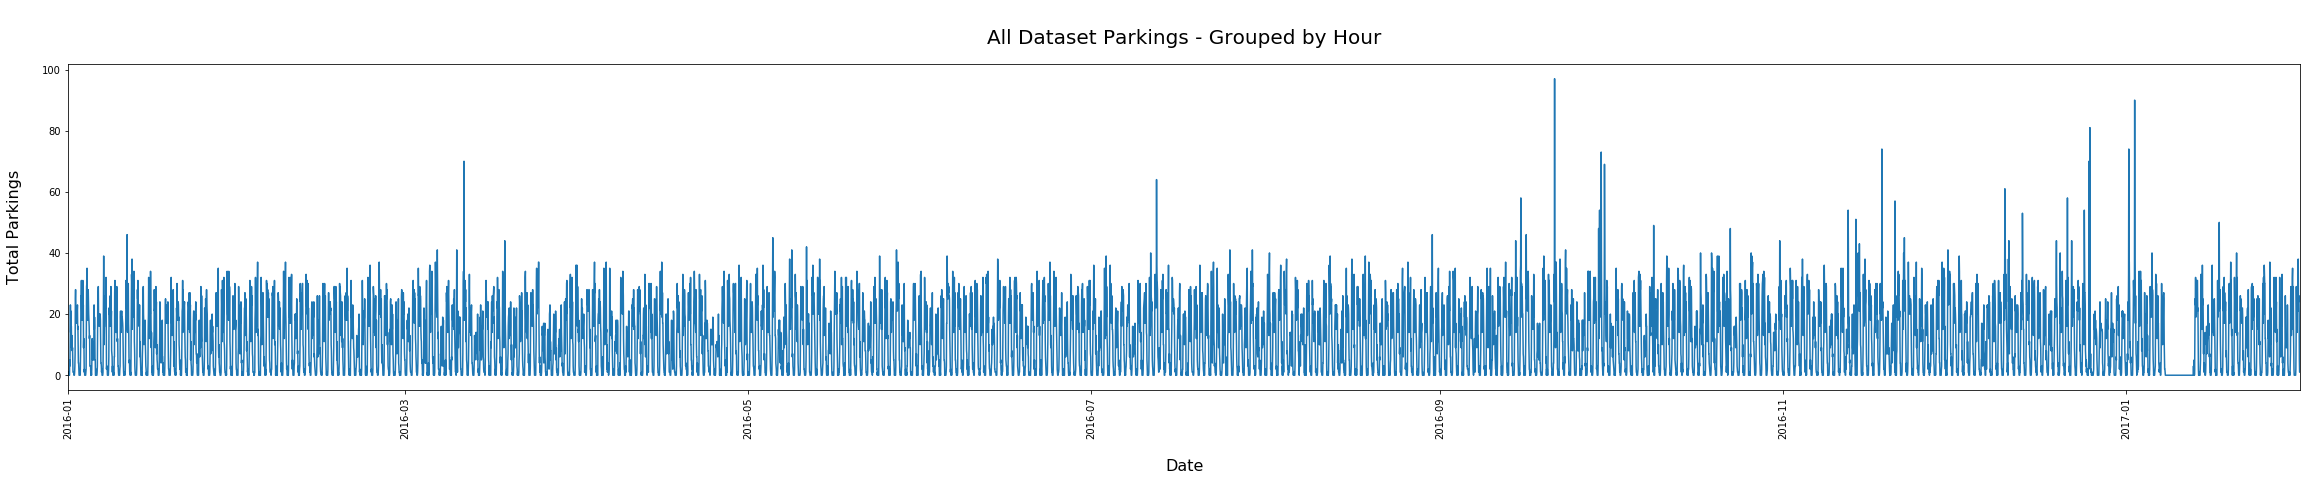

In [25]:
plt.subplots(figsize=(40,6))
plt.title("\nAll Dataset Parkings - Grouped by Hour", fontsize=20, pad=20)
plt.xlabel("Date", fontsize=16, labelpad=20)
plt.ylabel("Total Parkings", fontsize=16, labelpad=20)

plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.xticks(rotation=90)

plt.plot(df_hour)

In [26]:
print("Grouping by Day...")
df_day = final
df_day = df_day.groupby(df_day[' Arrived'].dt.date).size().reset_index(name='TotalParkings')
df_day = df_day.set_index(df_day[' Arrived'], drop=True)
df_day.drop(' Arrived', axis=1, inplace=True)
print("Done!")
df_day

Grouping by Day...
Done!


,TotalParkings
Arrived,
2016-01-01,168
2016-01-02,279
2016-01-03,308
2016-01-04,342
2016-01-05,164
...,...
2017-01-27,331
2017-01-28,242
2017-01-29,182


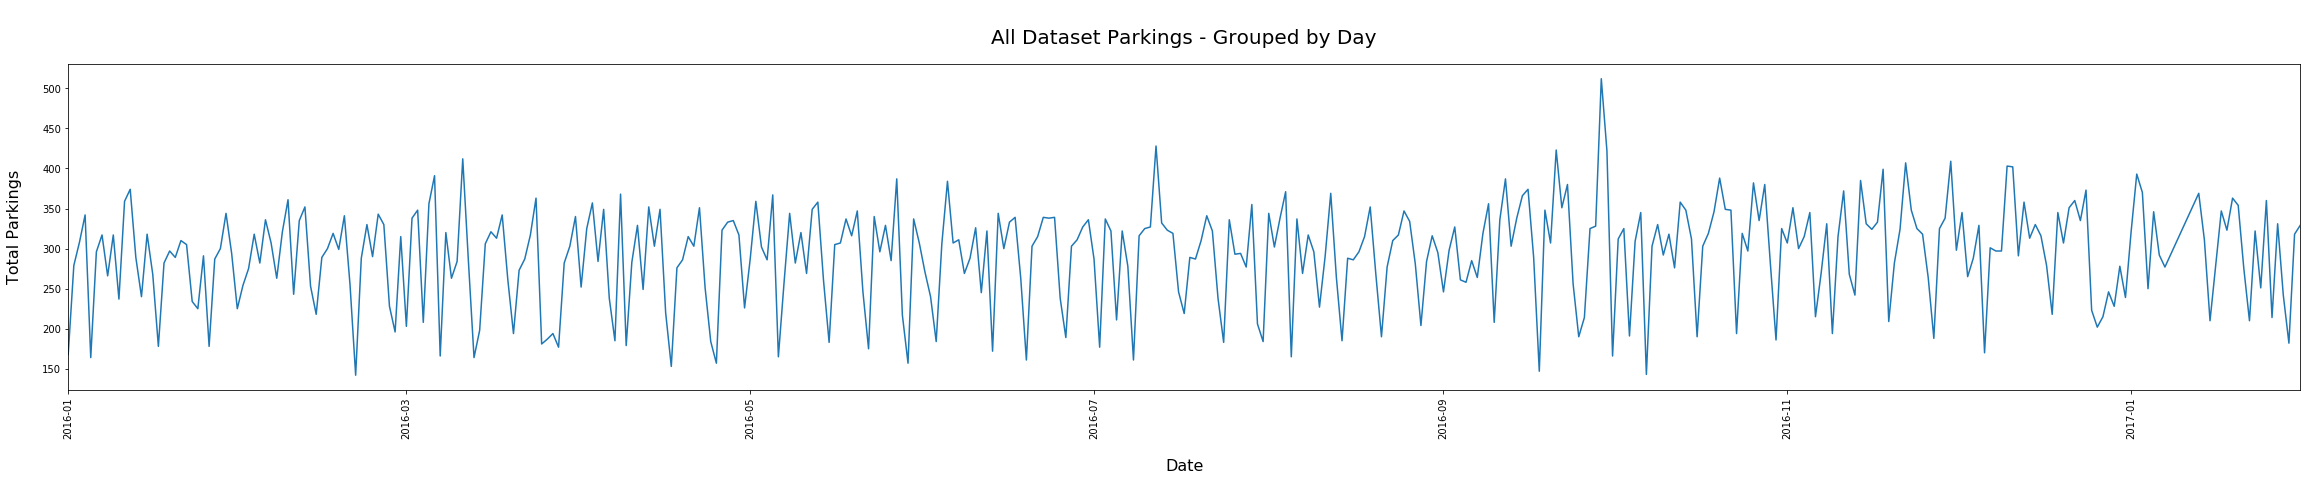

In [30]:
plt.subplots(figsize=(40,6))
plt.title("\nTotal: ", fontsize=30, pad=20)
plt.title("\nAll Dataset Parkings - Grouped by Day", fontsize=20, pad=20)
plt.xlabel("Date", fontsize=16, labelpad=20)
plt.ylabel("Total Parkings", fontsize=16, labelpad=20)

plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.xticks(rotation=90)

plt.plot(df_day)

In [31]:
df_month = final.copy()
df_month['TotalParkings'] = 1
print("Grouping by Month...")
df_month = df_month.groupby(pd.Grouper(freq='M', key=' Arrived')).sum().reset_index()
df_month[' Arrived'] = df_month[' Arrived'].dt.strftime('%m-%Y')
df_month = df_month.set_index(df_month[' Arrived'], drop=True)
df_month.drop(' Arrived', axis=1, inplace=True)
df_month = df_month.rename(columns={"index": "TotalParkings"})
print("Done!")
df_month

Grouping by Month...
Done!


,TotalParkings
Arrived,
01-2016,8581
02-2016,8383
03-2016,8577
04-2016,8432
05-2016,9077
06-2016,8703
07-2016,8845
08-2016,9034
09-2016,9418


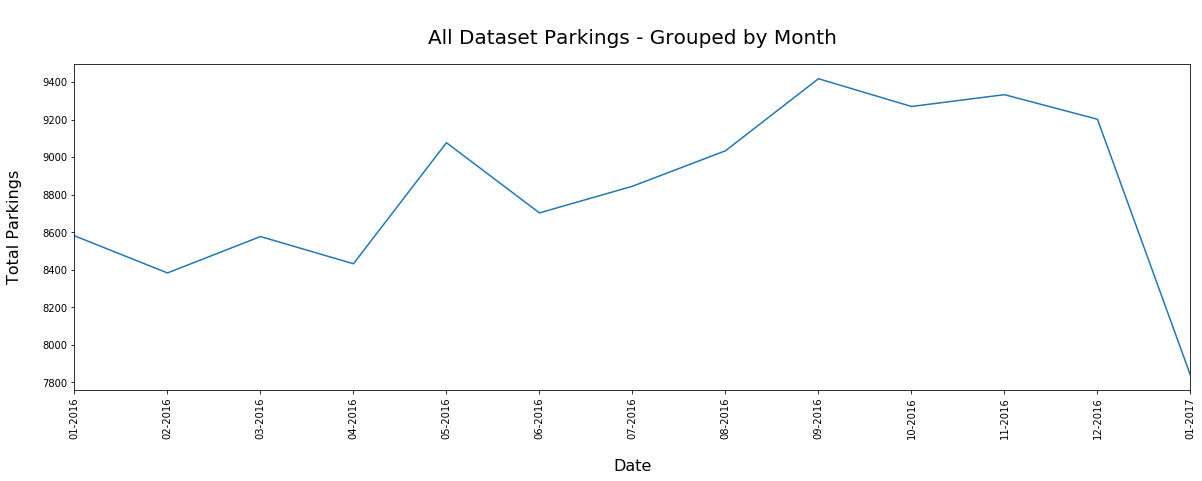

In [34]:
plt.subplots(figsize=(20,6))
plt.title("\nTotal: ", fontsize=30, pad=20)
plt.title("\nAll Dataset Parkings - Grouped by Month", fontsize=20, pad=20)
plt.xlabel("Date", fontsize=16, labelpad=20)
plt.ylabel("Total Parkings", fontsize=16, labelpad=20)

plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.xticks(rotation=90)

plt.plot(df_month)

In [33]:
print("Writing output file...")
final.to_csv('Parking-Oficial-Dataset-OnStreet.csv', index=False)
print("Done!")

Writing output file...
Done!
